<a href="https://colab.research.google.com/github/mgarbanzo/goes-r_datajam_2023/blob/main/DataJam_SUVI_Part_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

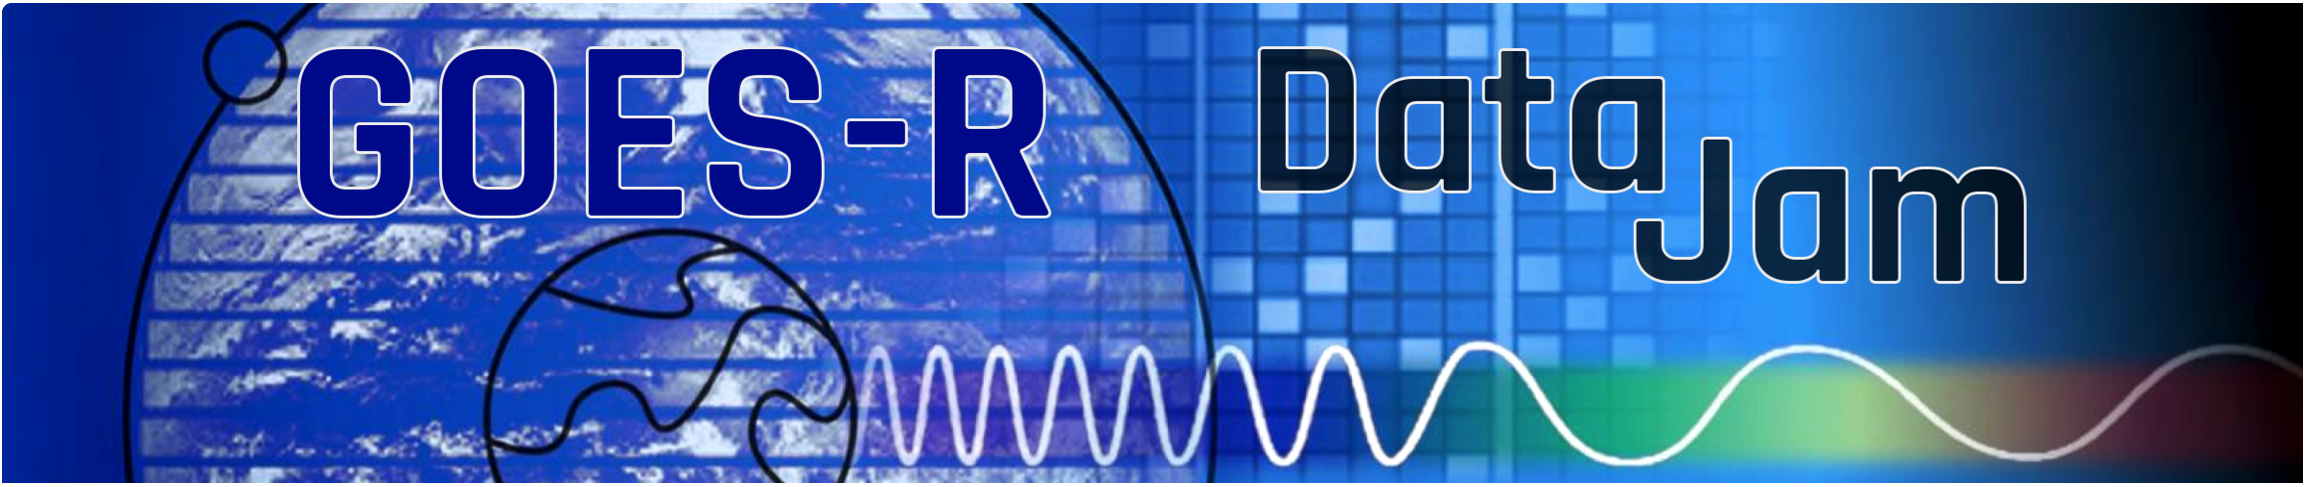

Diego Souza, Engineer, INPE (Brasil)

Dr. Marcial Garbanzo-Salas, Professor, UCR (Costa Rica)

# Data Download

You can go to [this website](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi) and set the appropriate configuration and look for links to netCDF files or FITS of the SUVI instrument.

For this example lets use [this link](https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc).

https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc

The following command will download the data into the Colab Research directory:

In [4]:
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc

--2023-09-10 05:36:20--  https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.95.121, 52.217.201.137, 3.5.28.100, ...
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.95.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4991105 (4.8M) [binary/octet-stream]
Saving to: ‘OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc.1’

OR_SUVI-L1b-Fe171_G 100%[===================>]   4.76M  21.7MB/s    in 0.2s    

2023-09-10 05:36:20 (21.7 MB/s) - ‘OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc.1’ saved [4991105/4991105]



We will need a NetCDF Python Library to read the data, it can be installed using:

In [5]:
!pip install netCDF4

Now that it is installed, we load the library and create a link to the file using Dataset:

In [6]:
import netCDF4 as nc
dataset = nc.Dataset("/content/OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc")

at this point we are ready to extract the data, but first lets take a quick look at the metadata.

## Metadata

Inside the NetCDF file there is a lot of information about the information (metadata).

The dimensions and variables are particularly important as information about the size and physical variables is contenied there.

In [7]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    production_site: WCDAS
    dataset_name: OR_SUVI-L1b-Fe171_G16_s20232461820113_e20232461820123_c20232461820320.nc
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    iso_series_metadata_id: f5816f57-fd6d-11e3-a3ac-0800200c9a66
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: SUVI L1b Solar Imagery: EUV
    summary: SUVI L1b Solar Imagery: EUV Products are images of the sun at six wavelengths and multiple radiance level ranges spanning many orders of magnitude in support of viewing the sun during different types of solar activity. Different combinations of aperture p

**Pro Tip**: Look into all the variables using

`print(dataset.variables)`

or just at the RAD variable using

`print(dataset.variables['RAD'])`

## Extract data and plotting

We can extract the values using the following command, the [:] means that Python needs to extract all values for the RAD variable.

In [8]:
data = dataset.variables['RAD'][:]

That is it!

Now we just load the Pylab library to plot, and the Numpy library to easily handle numerical arrays and we can look at the data.

Heads up! It will look bad the first time! It will get better in a second!

In [9]:
import pylab as plt
import numpy as np

data = np.array(data)
print(data)

[[ 2.3765564e-03 -1.5478134e-03  2.1934509e-05 ... -2.9215813e-03
  -1.5478134e-03 -1.5478134e-03]
 [ 3.1614304e-03  8.0680847e-04 -3.3140182e-03 ... -1.5478134e-03
  -1.5478134e-03  2.1934509e-05]
 [ 8.0680847e-04  1.5916824e-03  2.3765564e-03 ... -1.5478134e-03
   8.0680847e-04 -7.6293945e-04]
 ...
 [ 2.9654503e-03 -7.6293945e-04  1.5916824e-03 ... -2.1367073e-03
   2.1934509e-05 -7.6293945e-04]
 [ 1.5916824e-03  2.3765564e-03  2.1934509e-05 ... -1.5478134e-03
   8.0680847e-04  2.1934509e-05]
 [-1.5478134e-03  2.1934509e-05  2.1934509e-05 ...  1.3957024e-03
   2.9654503e-03  8.0680847e-04]]


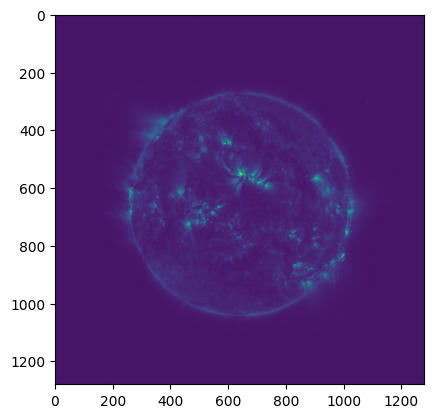

In [10]:
plt.figure()
plt.imshow(data)

I told you it would look bad! Lets fix it!

## Improving visualization

Now we just need to increase the size of the plot, use a nice color table and the correct values for max and min.

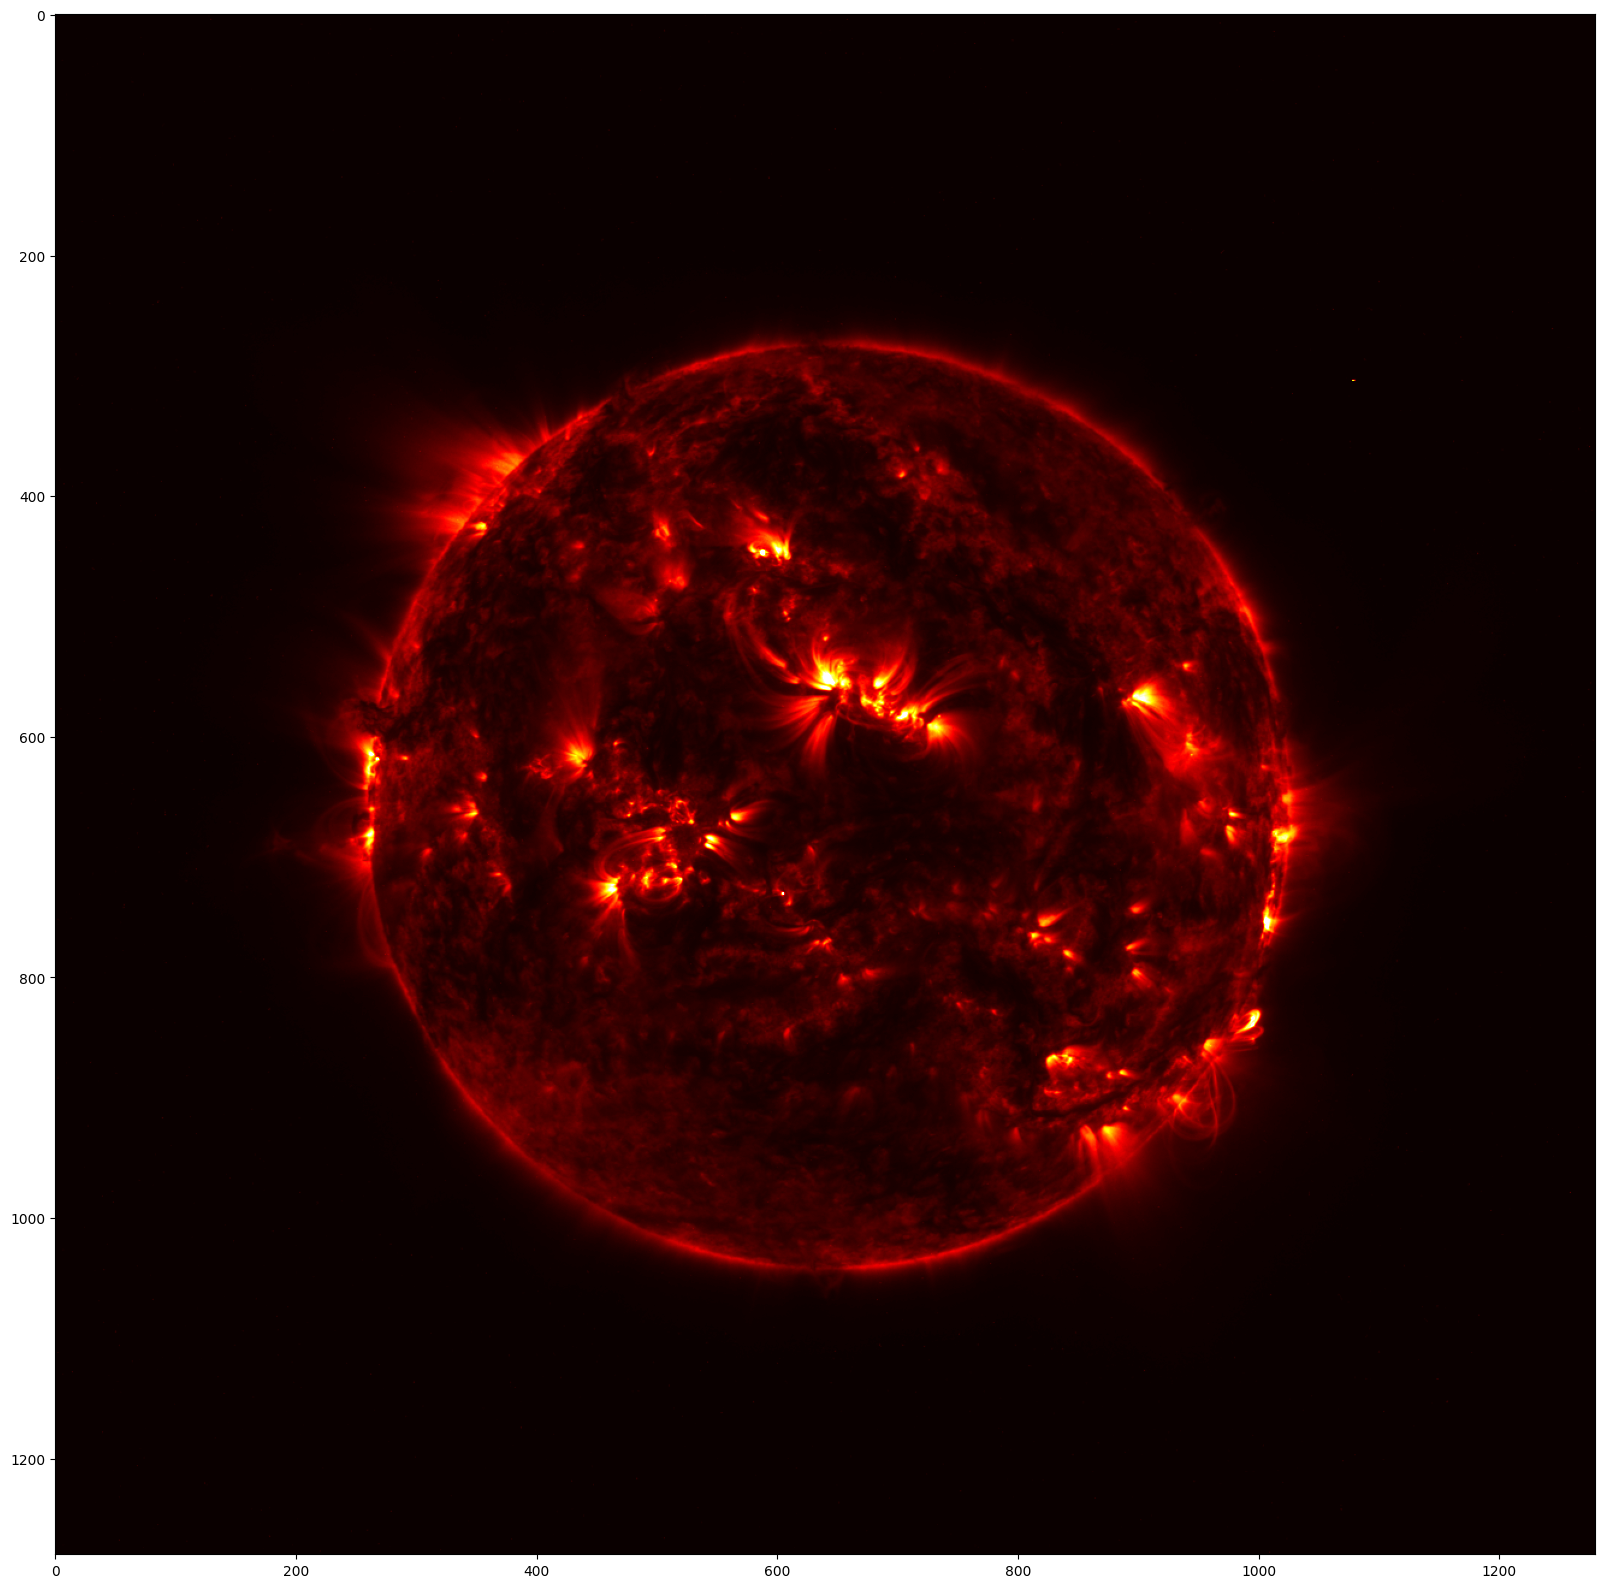

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(data, cmap='hot', vmin=0, vmax=8)

Now it looks more like the Sun!
